### Distribution of Makespan by Model
This boxplot visualizes the distribution of makespan values for each model. The x-axis shows the different models (renamed for clarity), and the y-axis represents the makespan values. The plot uses grey tones for a neutral appearance, and the x-axis labels are smaller for better readability. The column name is omitted for a cleaner look. This visualization helps compare the spread and central tendency of makespan across models.

<Figure size 3200x2000 with 0 Axes>

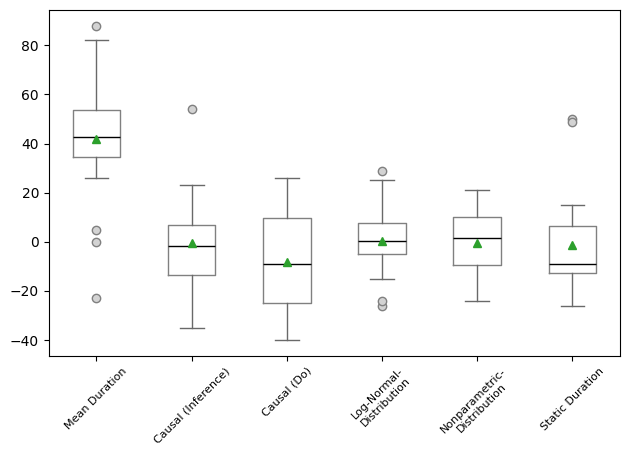

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV (adjust path as needed)
df_mean = pd.read_csv('experiment_results_20250428_222337.csv')

# Define new model names for x-axis and desired order
model_rename = {
    'TruthModel': 'Static Duration',
    'CausalModel': 'Causal (Inference)',
    'CausalDoModel': 'Causal (Do)',
    'AverageOperationModel': 'Mean Duration',
    'LogNormalDistributionModel': 'Log-Normal-\nDistribution',
    'HistoDistributionModel': 'Nonparametric-\nDistribution'
}
desired_order = ['Mean Duration', 'Causal (Inference)', 'Causal (Do)','Log-Normal-\nDistribution', 'Nonparametric-\nDistribution','Static Duration']

df_mean['Model_renamed'] = df_mean['Model'].map(model_rename)
df_mean['Model_renamed'] = pd.Categorical(df_mean['Model_renamed'], categories=desired_order, ordered=True)

desired_order_no_mean = ['Causal (Inference)', 'Causal (Do)', 'Log-Normal-\nDistribution', 'Nonparametric-\nDistribution', 'Static Duration']

# Remove 'Mean Duration' model
df_no_mean = df_mean[df_mean['Model'] != 'AverageOperationModel']

df = df_mean

# Boxplot in grey tones with higher DPI and smaller x-axis labels, no column name
plt.figure(figsize=(8,5), dpi=400)
box = df.boxplot(column='makespan', by='Model_renamed', grid=False, showfliers=True,
                 showmeans=True,
                 boxprops=dict(color='gray'),
                 whiskerprops=dict(color='dimgray'),
                 capprops=dict(color='dimgray'),
                 medianprops=dict(color='black'),
                 flierprops=dict(markerfacecolor='lightgray', markeredgecolor='gray'))
plt.title('', fontsize=12)
plt.suptitle('')
plt.xlabel('')
plt.ylabel('')  # Remove column name from y-axis
plt.xticks(rotation=45, fontsize=8)  # Make x-axis values smaller
plt.tight_layout()
plt.savefig("output/makespan_dif.svg", format="svg")
plt.show()

In [4]:
import tabulate
describe_table = df.groupby("Model").describe()
results = describe_table.xs('mean', level=1, axis=1)
print(tabulate.tabulate(results, headers='keys', tablefmt='rounded_outline'))

╭────────────────────────────┬────────────┬──────────────┬───────────────────────┬─────────────────────┬─────────────────────┬───────────────────┬──────────────────┬───────────────────┬─────────────┬────────────╮
│ Model                      │   makespan │   throughput │   avg_throughput_diff │   avg_abs_start_dev │   avg_duration_diff │   levenshtein_seq │   leven_a3_0_seq │   toolchange_perc │        seed │   instance │
├────────────────────────────┼────────────┼──────────────┼───────────────────────┼─────────────────────┼─────────────────────┼───────────────────┼──────────────────┼───────────────────┼─────────────┼────────────┤
│ AverageOperationModel      │      41.9  │       16.895 │                0.21   │             101.895 │              0.7675 │           41.05   │            34.95 │           19.2612 │ 8.12285e+06 │        100 │
│ BasicModel                 │      60.8  │       26.635 │                0.288  │             106.145 │              0.791  │           40.7    │  

/tmp/ipykernel_1363838/2637066207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/tmp/ipykernel_1363838/2637066207.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Model_renamed')['throughput'].mean()
/tmp/ipykernel_1363838/2637066207.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby('Model_renamed')['throughput'].std()


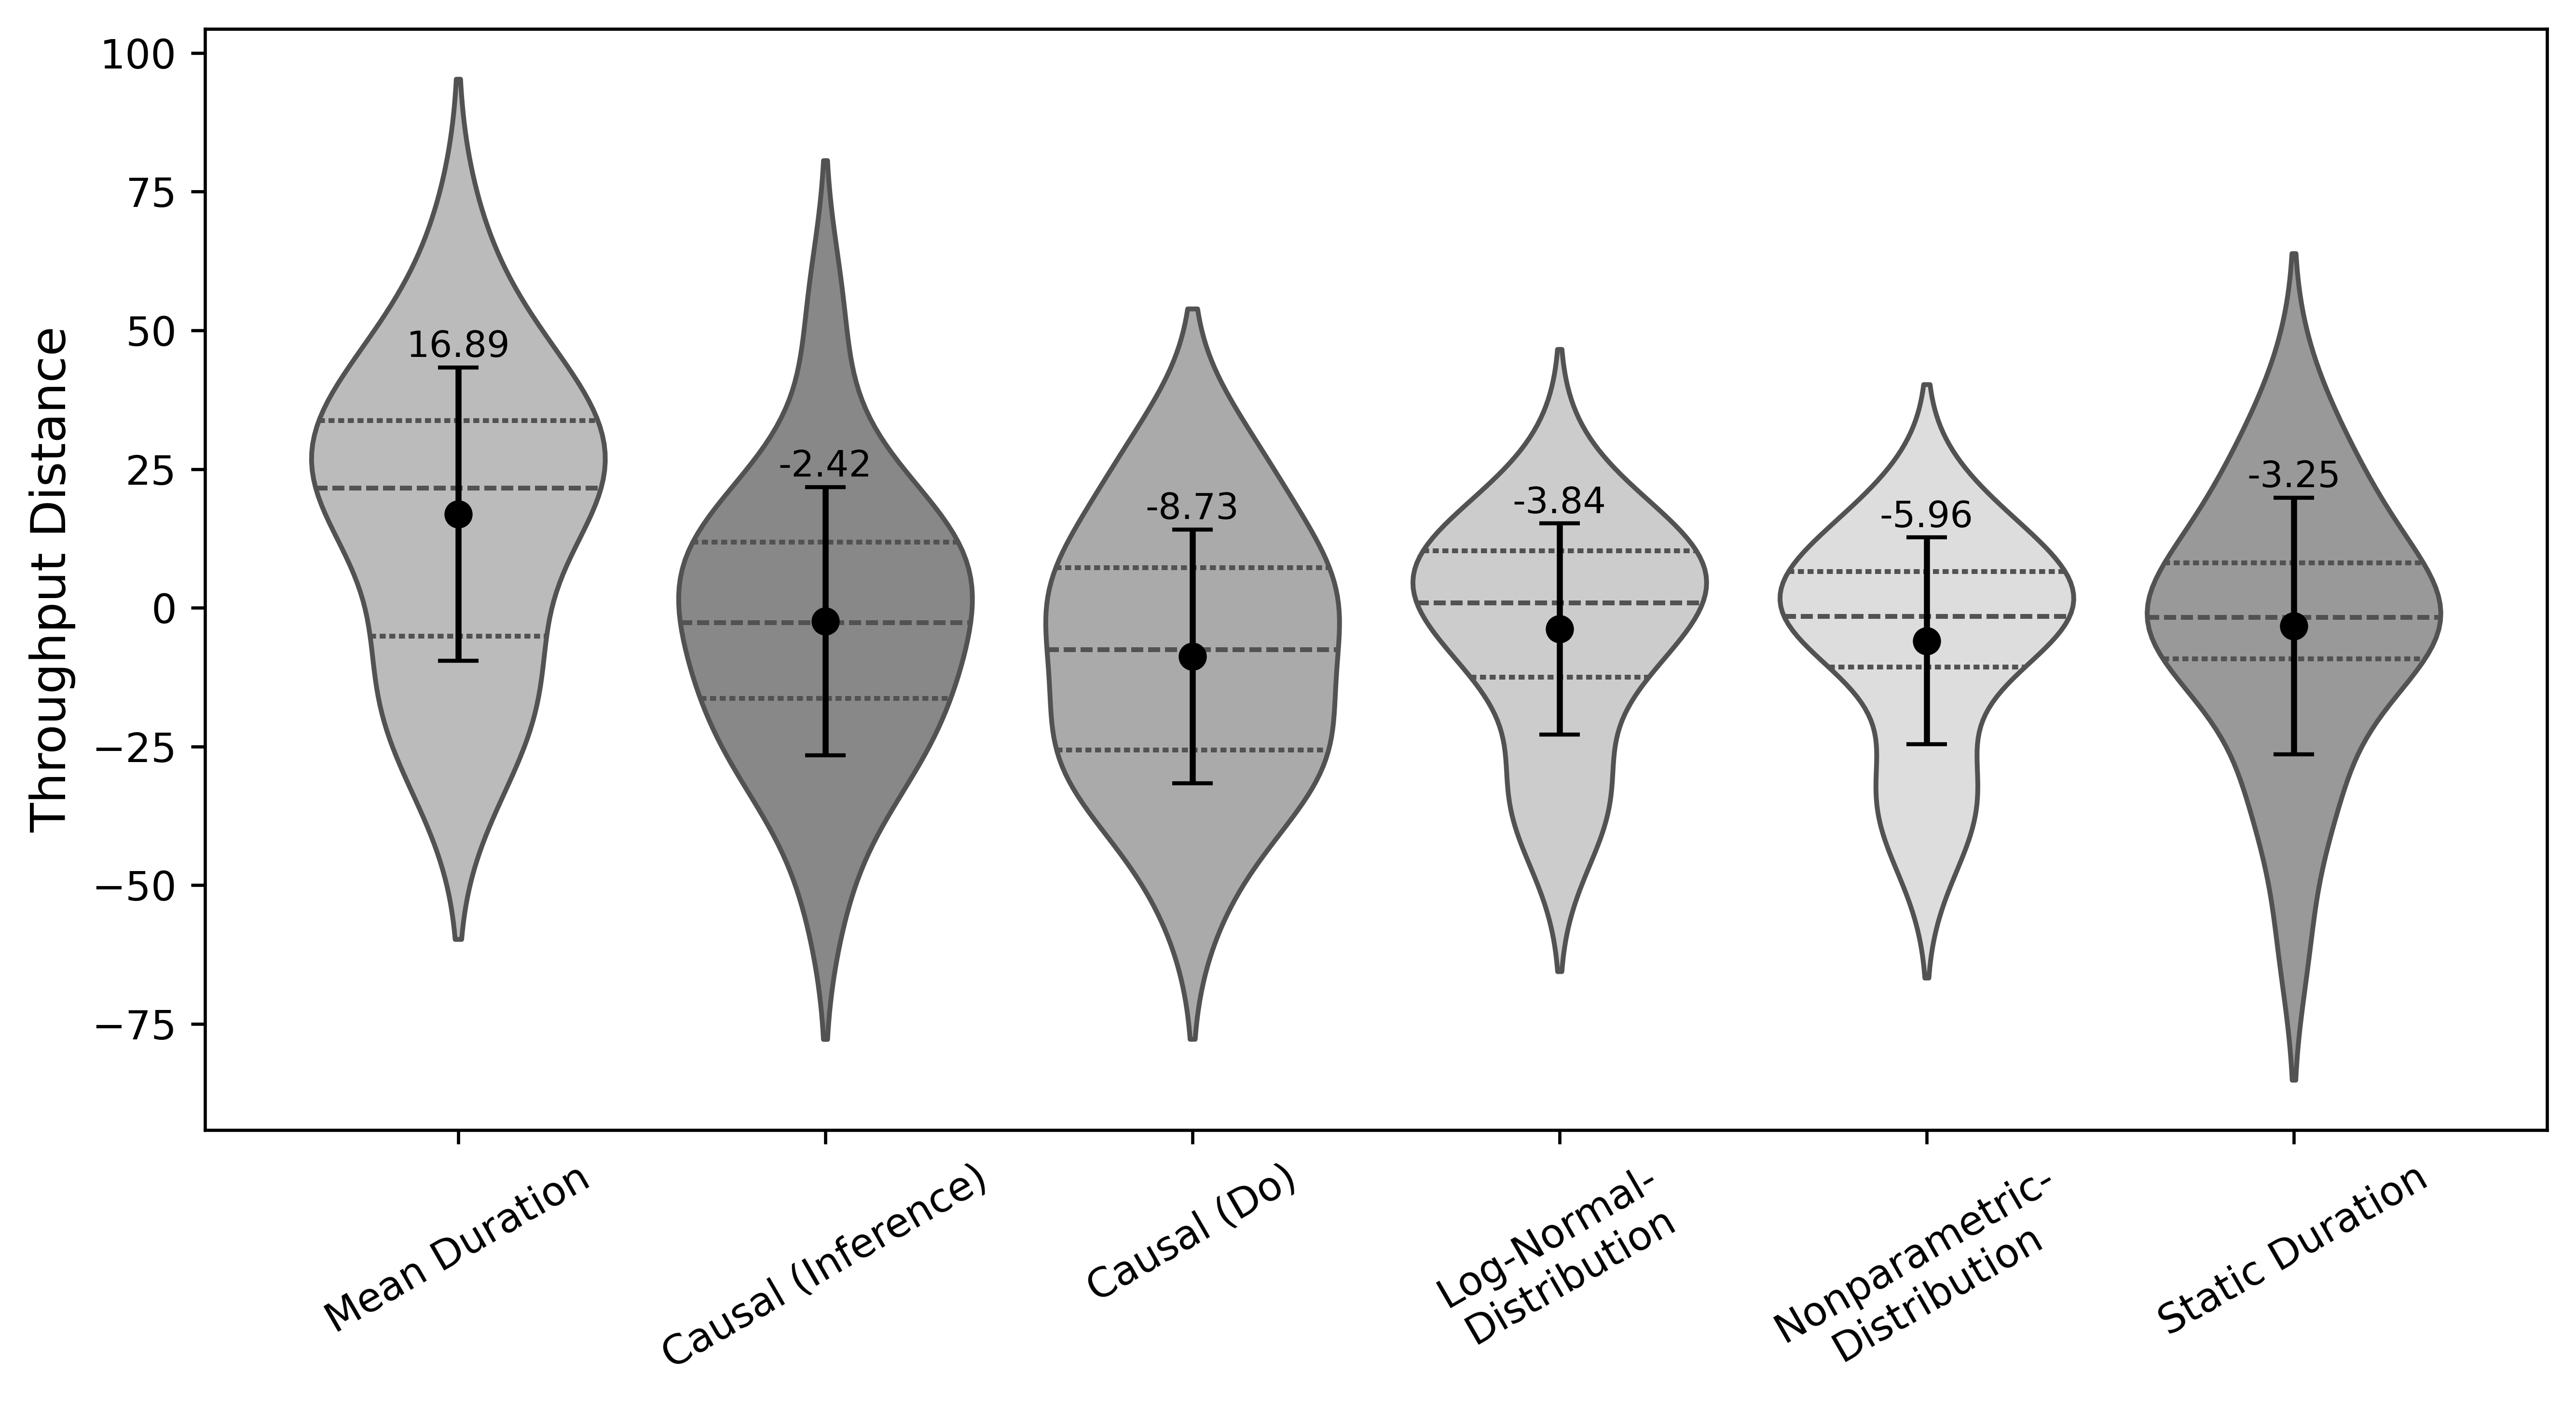

In [5]:
import seaborn as sns

plt.figure(figsize=(9,5), dpi=600)
# Use a subtle grey palette for low color
palette = sns.color_palette(['#bbbbbb', '#888888', '#aaaaaa', '#cccccc', '#dddddd', '#999999'])

df = df_mean

ax = sns.violinplot(
    x='Model_renamed',
    y='throughput',
    data=df,
    inner='quartile',
    palette=palette,
    linewidth=1.2
)

# Overlay mean and std as points and error bars
means = df.groupby('Model_renamed')['throughput'].mean()
stds = df.groupby('Model_renamed')['throughput'].std()
x_pos = range(len(means))
ax.errorbar(x=x_pos, y=means, yerr=stds, fmt='o', color='black', capsize=5)

# Annotate means above the error bars
for i, m in enumerate(means):
    ax.text(i, m + stds.iloc[i] + 0.5, f"{m:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.title('', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Throughput Distance', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
#plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig("output/throughput.svg", format="svg")
plt.show()

/tmp/ipykernel_1363838/2340407114.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Model_renamed')['makespan']


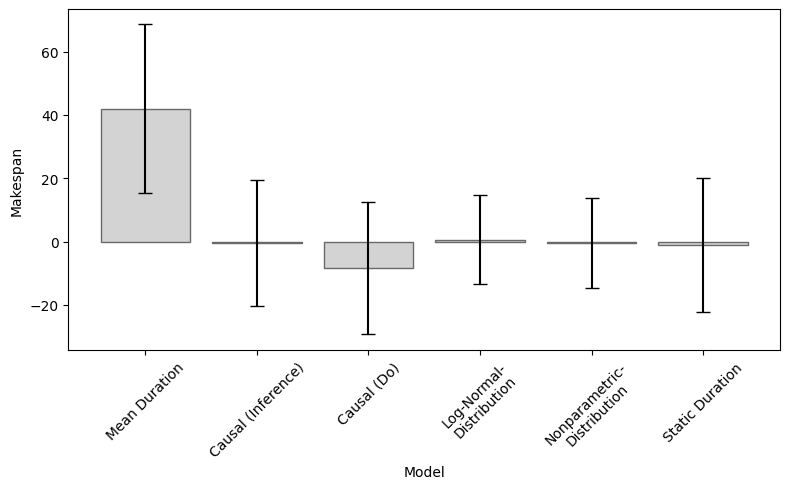

In [6]:
import numpy as np


grouped = df.groupby('Model_renamed')['makespan']
means = grouped.mean()
stds  = grouped.std()

# Bar plot in grey tones
plt.figure(figsize=(8,5))
plt.bar(means.index, means, yerr=stds, capsize=5, color='lightgray', edgecolor='dimgray')
plt.xlabel('Model')
plt.ylabel('Makespan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1363838/1827134966.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/tmp/ipykernel_1363838/1827134966.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Model_renamed')['levenshtein_seq'].mean()
/tmp/ipykernel_1363838/1827134966.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby('Model_renamed')['levenshtein_seq'].std()
/tmp/ipykernel_1363838/1827134966.py:31: UserWarning: No artists with labe

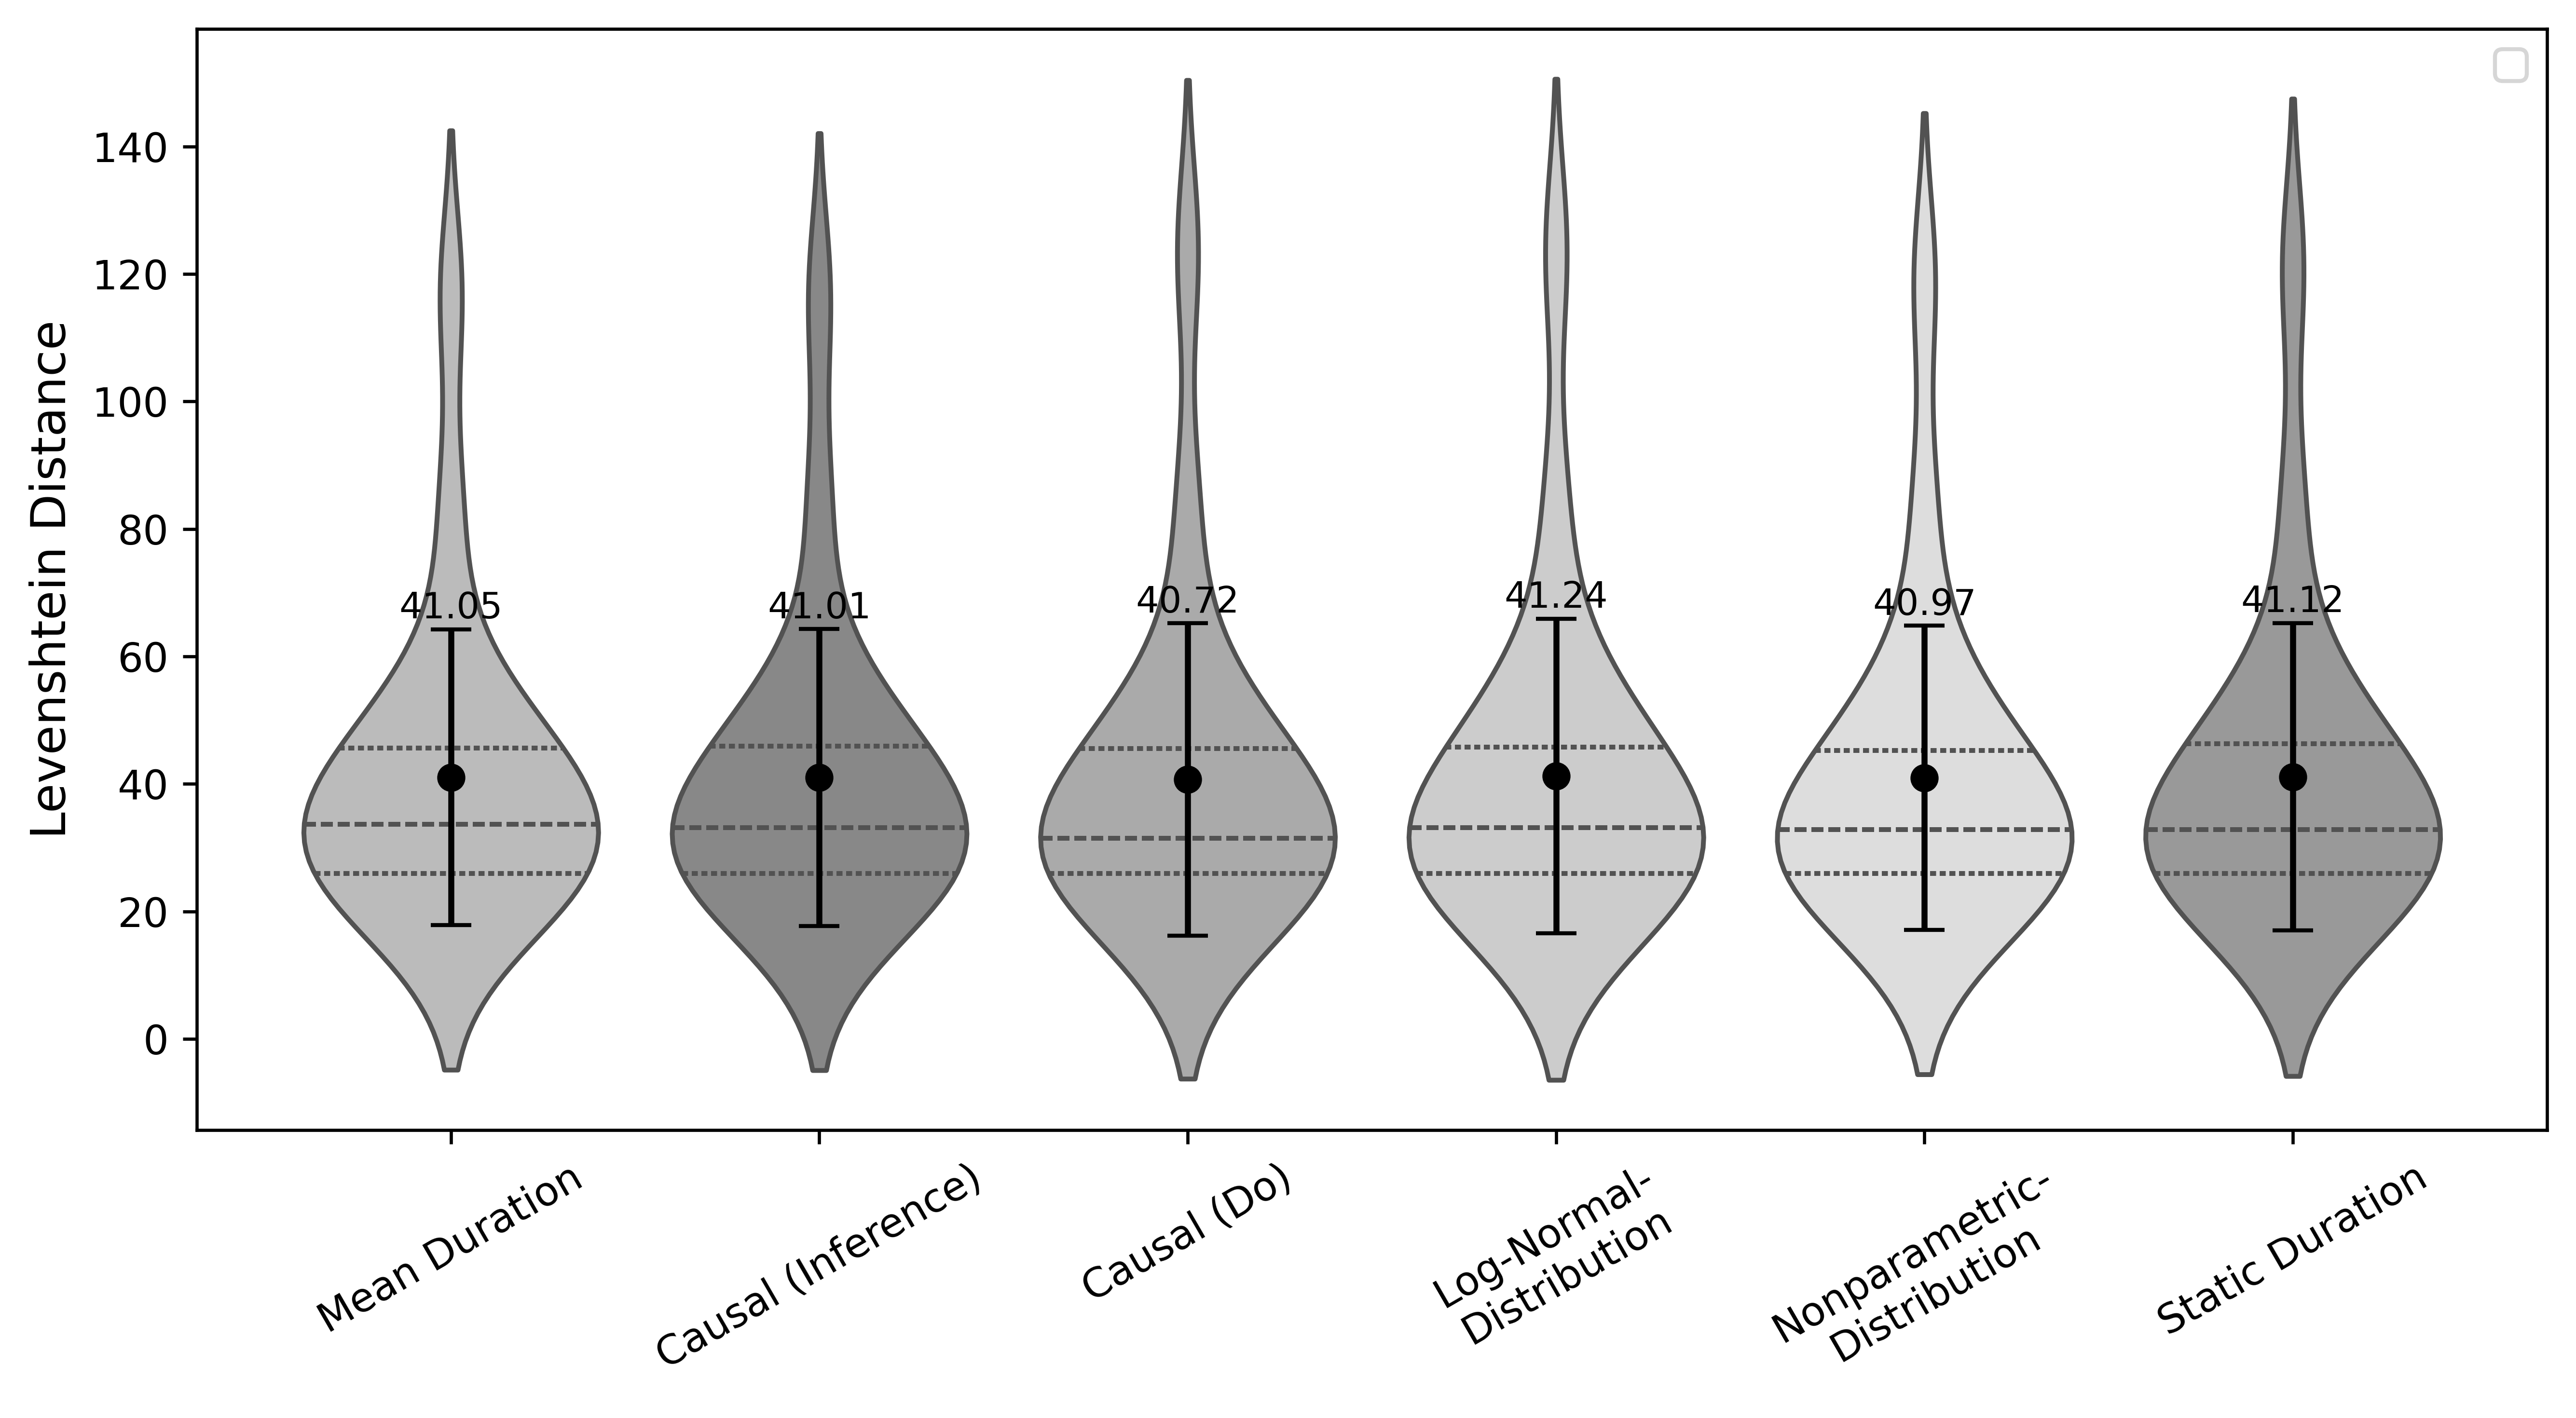

In [7]:
import seaborn as sns

plt.figure(figsize=(9,5), dpi=600)
# Use a subtle grey palette for low color
palette = sns.color_palette(['#bbbbbb', '#888888', '#aaaaaa', '#cccccc', '#dddddd', '#999999'])

ax = sns.violinplot(
    x='Model_renamed',
    y='levenshtein_seq',
    data=df,
    inner='quartile',
    palette=palette,
    linewidth=1.2
)

# Overlay mean and std as points and error bars
means = df.groupby('Model_renamed')['levenshtein_seq'].mean()
stds = df.groupby('Model_renamed')['levenshtein_seq'].std()
x_pos = range(len(means))
ax.errorbar(x=x_pos, y=means, yerr=stds, fmt='o', color='black', capsize=5)

# Annotate means above the error bars
for i, m in enumerate(means):
    ax.text(i, m + stds.iloc[i] + 0.5, f"{m:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.title('', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Levenshtein Distance', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig("output/leven_seq_dif.svg", format="svg")
plt.show()

In [8]:
from scipy.stats import f_oneway, ttest_ind
models = df['Model_renamed'].unique()
samples = [ df[df['Model_renamed']==m]['makespan'] for m in models ]
f_stat, p_val = f_oneway(*samples)
print(f"ANOVA: F={f_stat:.2f}, p={p_val:.3e}")

# Example pairwise t-tests
for i in range(len(models)):
    for j in range(i+1, len(models)):
        a = df[df['Model_renamed']==models[i]]['makespan']
        b = df[df['Model_renamed']==models[j]]['makespan']
        t, p = ttest_ind(a, b, equal_var=False)
        print(f"{models[i]} vs {models[j]}: p={p:.3e}")

ANOVA: F=nan, p=nan
Static Duration vs Causal (Inference): p=9.329e-01
Static Duration vs Causal (Do): p=2.825e-01
Static Duration vs Mean Duration: p=2.008e-06
Static Duration vs Log-Normal-
Distribution: p=7.729e-01
Static Duration vs Nonparametric-
Distribution: p=9.166e-01
Static Duration vs nan: p=nan
Causal (Inference) vs Causal (Do): p=2.351e-01
Causal (Inference) vs Mean Duration: p=1.881e-06
Causal (Inference) vs Log-Normal-
Distribution: p=8.413e-01
Causal (Inference) vs Nonparametric-
Distribution: p=9.928e-01
Causal (Inference) vs nan: p=nan
Causal (Do) vs Mean Duration: p=1.026e-07
Causal (Do) vs Log-Normal-
Distribution: p=1.241e-01
Causal (Do) vs Nonparametric-
Distribution: p=1.744e-01
Causal (Do) vs nan: p=nan
Mean Duration vs Log-Normal-
Distribution: p=1.141e-06
Mean Duration vs Nonparametric-
Distribution: p=7.555e-07
Mean Duration vs nan: p=nan
Log-Normal-
Distribution vs Nonparametric-
Distribution: p=8.154e-01
Log-Normal-
Distribution vs nan: p=nan
Nonparametric-

/tmp/ipykernel_1363838/1874206543.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = f_oneway(*samples)
/home/marvin/repo/PlanCausal/.venv/lib/python3.10/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [9]:
import pandas as pd

# 2) Model list & means
models = df['Model_renamed'].unique()
means = df.groupby('Model_renamed')['makespan'].mean()

# 3) Build difference matrix
diff_matrix = pd.DataFrame(index=models, columns=models, dtype=float)
for i in models:
    for j in models:
        diff_matrix.loc[i, j] = means[i] - means[j]

print(diff_matrix)

/tmp/ipykernel_1363838/467923625.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Model_renamed')['makespan'].mean()


KeyError: nan

In [ ]:
from scipy.stats import ttest_ind

pval_matrix = pd.DataFrame(index=models, columns=models, dtype=float)
for i in models:
    for j in models:
        a = df[df['Model_renamed'] == i]['makespan']
        b = df[df['Model_renamed'] == j]['makespan']
        _, p = ttest_ind(a, b, equal_var=False)
        pval_matrix.loc[i, j] = p

print(pval_matrix)

                    Static Duration  Causal (Inference)  Causal (Do)  \
Static Duration            1.000000            0.708055     0.198517   
Causal (Inference)         0.708055            1.000000     0.541028   
Causal (Do)                0.198517            0.541028     1.000000   
Mean Duration              0.448808            0.746316     0.799414   
Log-Normal                 0.198645            0.664129     0.763450   
Nonparametric              0.836569            0.881526     0.420827   

                    Mean Duration  Log-Normal  Nonparametric  
Static Duration          0.448808    0.198645       0.836569  
Causal (Inference)       0.746316    0.664129       0.881526  
Causal (Do)              0.799414    0.763450       0.420827  
Mean Duration            1.000000    0.964213       0.629826  
Log-Normal               0.964213    1.000000       0.523415  
Nonparametric            0.629826    0.523415       1.000000  


In [ ]:
df.columns

Index(['Model', 'makespan', 'avg_makespan_diff', 'avg abs start dev',
       'avg duration dev', 'levenshtein_seq', 'ndcg_seq', 'leven_a3_0_seq',
       'ndcg_seq_a3', 'toolchange_perc', 'seed', 'instance', 'priority_rule',
       'Model_renamed'],
      dtype='object')

In [ ]:
# Select only numeric columns
num_cols = ['Model', 'makespan', 'throughput', 'avg_throughput_diff',
       'avg_abs_start_dev', 'avg_duration_diff', 'levenshtein_seq',
       'leven_a3_0_seq', 'toolchange_perc', 'seed', 'instance',
       'priority_rule', 'Model_renamed']
corr_matrix = df[num_cols].corr()

print(corr_matrix)

                   makespan  avg_makespan_diff  avg abs start dev  \
makespan           1.000000           0.295262          -0.433374   
avg_makespan_diff  0.295262           1.000000          -0.597994   
avg abs start dev -0.433374          -0.597994           1.000000   
avg duration dev  -0.643786          -0.695736           0.632250   
levenshtein_seq    0.666057          -0.085536           0.113213   
ndcg_seq          -0.712325           0.255289          -0.177565   
toolchange_perc   -0.379958           0.191888          -0.068067   

                   avg duration dev  levenshtein_seq  ndcg_seq  \
makespan                  -0.643786         0.666057 -0.712325   
avg_makespan_diff         -0.695736        -0.085536  0.255289   
avg abs start dev          0.632250         0.113213 -0.177565   
avg duration dev           1.000000        -0.248251  0.204222   
levenshtein_seq           -0.248251         1.000000 -0.868851   
ndcg_seq                   0.204222        -0.86885

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Correlation matrix in grey tones
mat = corr_matrix.values
labels = corr_matrix.index.tolist()

plt.figure(figsize=(8,6))
im = plt.imshow(mat, vmin=-1, vmax=1, cmap='Greys')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)), labels)
plt.title('Correlation Matrix of Metrics')
plt.tight_layout()
plt.show()

NameError: name 'corr_matrix' is not defined